# CHAPTER 6

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create synthetic dataset with 100 records
np.random.seed(42)
data = pd.DataFrame({
    'Category': np.random.choice(['Electronics', 'Clothing', 'Home Decor', 'Books', 'Toys'], 100),
    'Region': np.random.choice(['West', 'East', 'North', 'South'], 100),
    'Sales': np.random.randint(20, 150, 100)
})


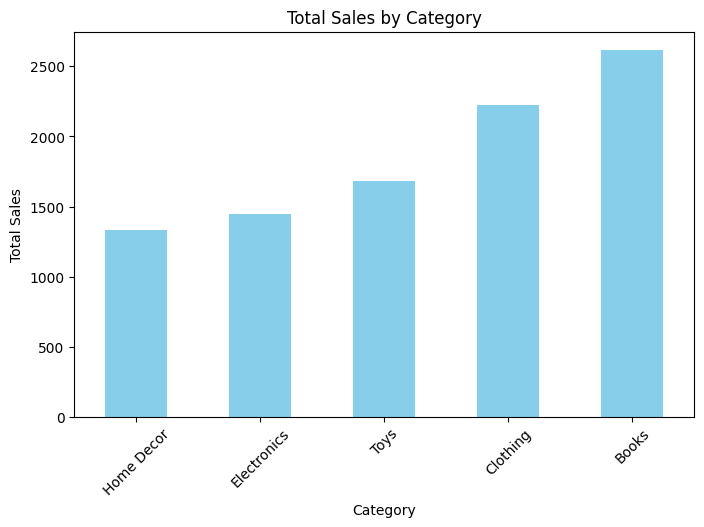

In [4]:
# 1. Bar Plot - Total sales by category
plt.figure(figsize=(8,5))
total_sales_by_cat = data.groupby('Category')['Sales'].sum().sort_values()
total_sales_by_cat.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



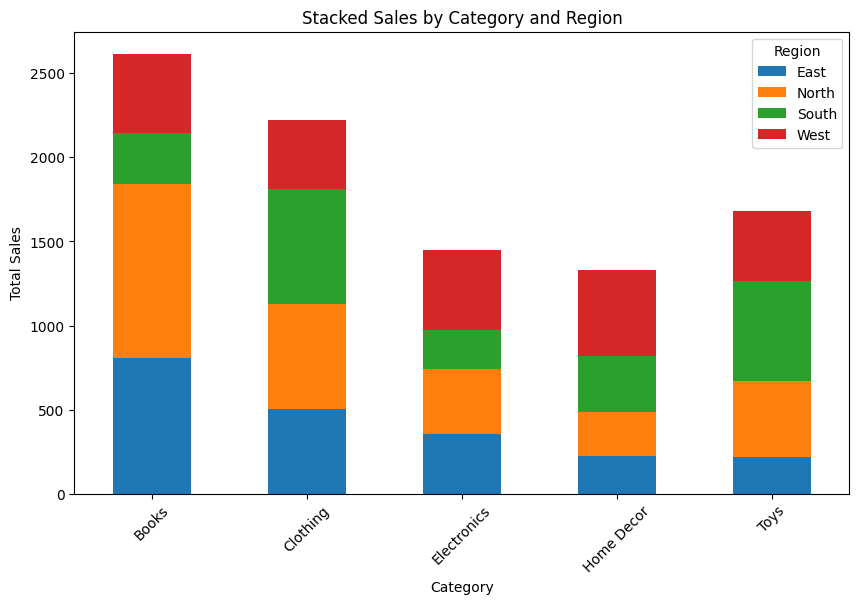

In [6]:
# 3. Stacked Bar Plot - Total sales by category stacked by region
total_sales = data.groupby(['Category', 'Region'])['Sales'].sum().unstack()
total_sales.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Stacked Sales by Category and Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

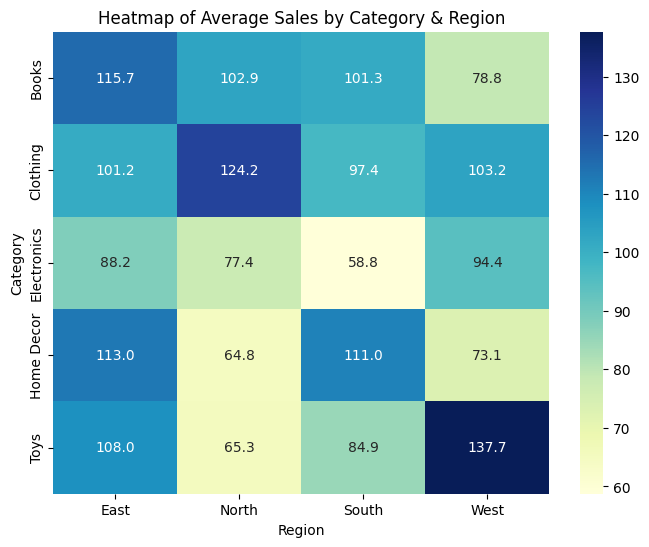

In [8]:

# 5. Heatmap - Average sales by category and region
pivot_data = data.pivot_table(index='Category', columns='Region', values='Sales', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Heatmap of Average Sales by Category & Region')
plt.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset 1: Median US Annual Household Income by Age Group (from Census)
data_income = pd.DataFrame({
    'Age Group': ['25-34', '35-44', '45-54', '55-64', '65-74', '75+'],
    'Median Income': [55000, 68000, 72000, 65000, 47000, 35000]
})


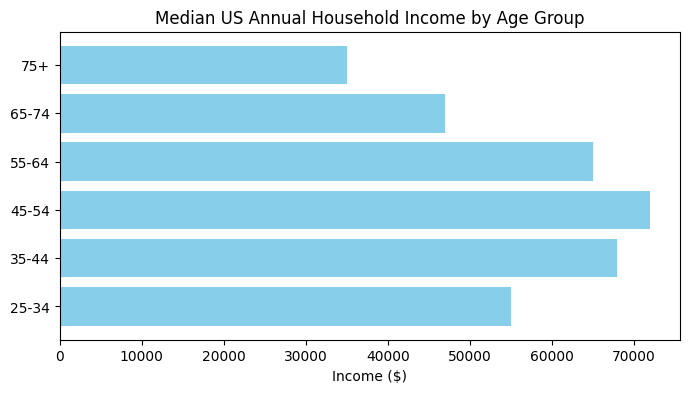

In [11]:

# 1. Simple horizontal bar plot ordered by income
plt.figure(figsize=(8,4))
plt.barh(data_income['Age Group'], data_income['Median Income'], color='skyblue')
plt.title('Median US Annual Household Income by Age Group')
plt.xlabel('Income ($)')
plt.show()

# Dataset 2: Median Income by Age Group and Race
data_income_race = pd.DataFrame({
    'Age Group': np.repeat(['25-34', '35-44', '45-54', '55-64', '65-74', '75+'], 4),
    'Race': ['Asian', 'White', 'Hispanic', 'Black'] * 6,
    'Median Income': [68000, 55000, 45000, 43000, 78000, 62000, 47000, 46000, 82000, 70000, 52000, 49000,
                      76000, 68000, 53000, 50000, 67000, 55000, 48000, 45000, 54000, 45000, 40000, 39000]
})


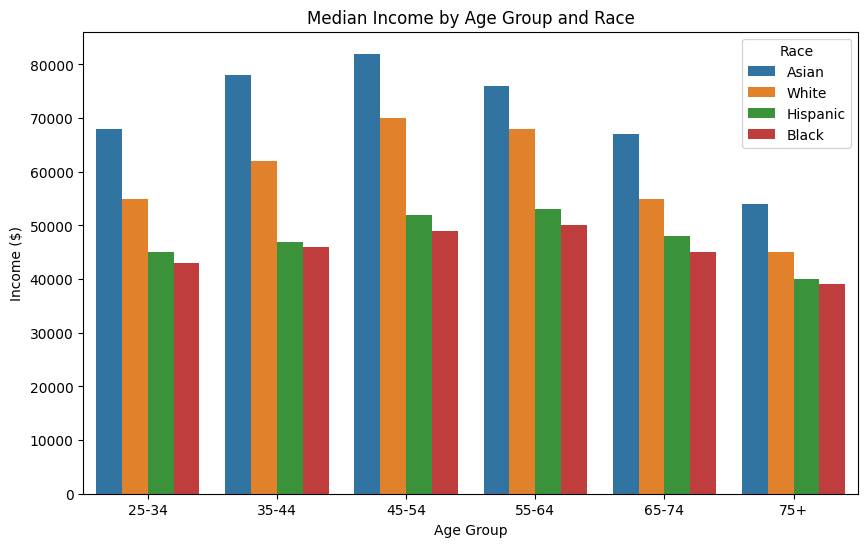

In [12]:

# 2. Grouped bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='Age Group', y='Median Income', hue='Race', data=data_income_race)
plt.title('Median Income by Age Group and Race')
plt.ylabel('Income ($)')
plt.show()



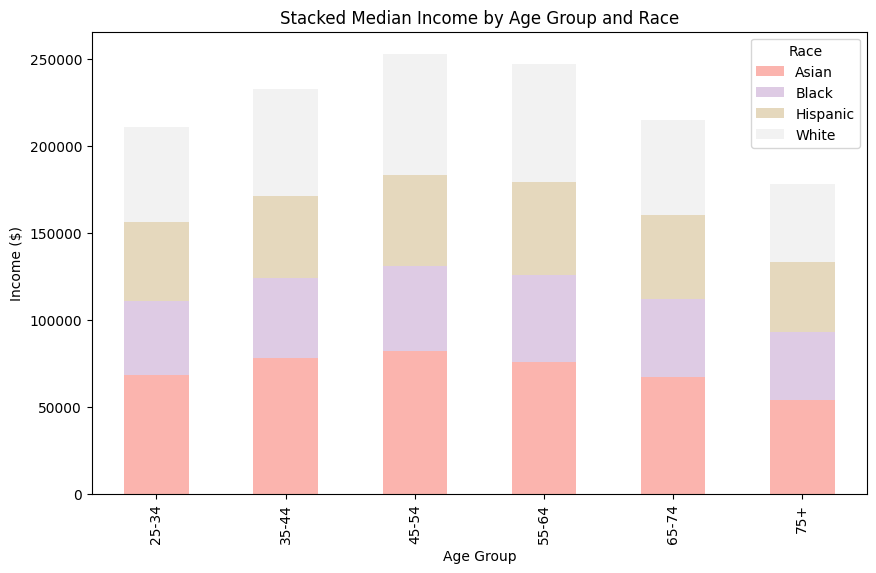

In [13]:

# 3. Stacked bar plot alternative (plotting manually)
income_pivot = data_income_race.pivot(index='Age Group', columns='Race', values='Median Income')
income_pivot.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Pastel1')
plt.title('Stacked Median Income by Age Group and Race')
plt.ylabel('Income ($)')
plt.show()


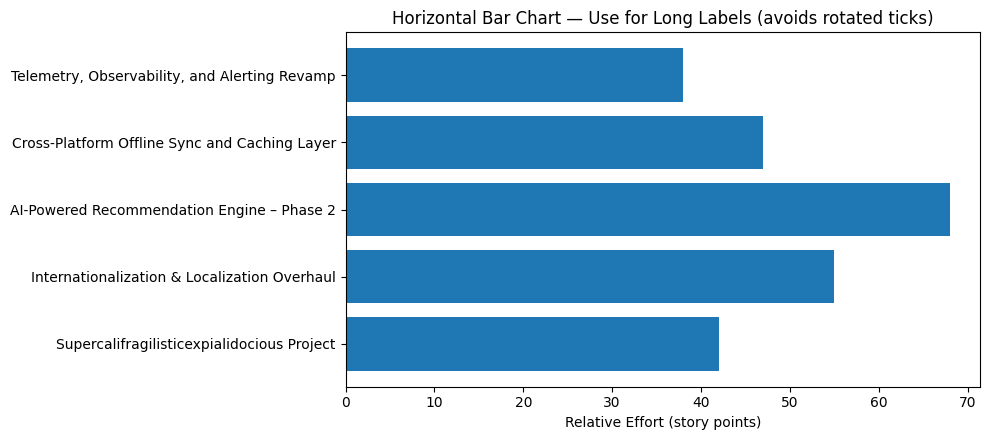

In [17]:
# Chapter 6: Additional visuals requested by the user
# - Horizontal bar chart example (long labels)
# - Life expectancy in the Americas (2007) shown as bars (to illustrate why bars are not ideal here)
# - Better alternative: dot plot for the same life expectancy data
#
# Important tool constraints: use matplotlib (no seaborn), single-plot figures, and do not manually set colors.

import matplotlib.pyplot as plt

# -----------------------------
# 1) Horizontal bar chart demo
# -----------------------------
categories = [
    "Supercalifragilisticexpialidocious Project",
    "Internationalization & Localization Overhaul",
    "AI-Powered Recommendation Engine – Phase 2",
    "Cross-Platform Offline Sync and Caching Layer",
    "Telemetry, Observability, and Alerting Revamp"
]
values = [42, 55, 68, 47, 38]

plt.figure(figsize=(10, 4.5))
y_pos = range(len(categories))
plt.barh(y_pos, values)
plt.yticks(y_pos, categories)
plt.xlabel("Relative Effort (story points)")
plt.title("Horizontal Bar Chart — Use for Long Labels (avoids rotated ticks)")
plt.tight_layout()
plt.show()


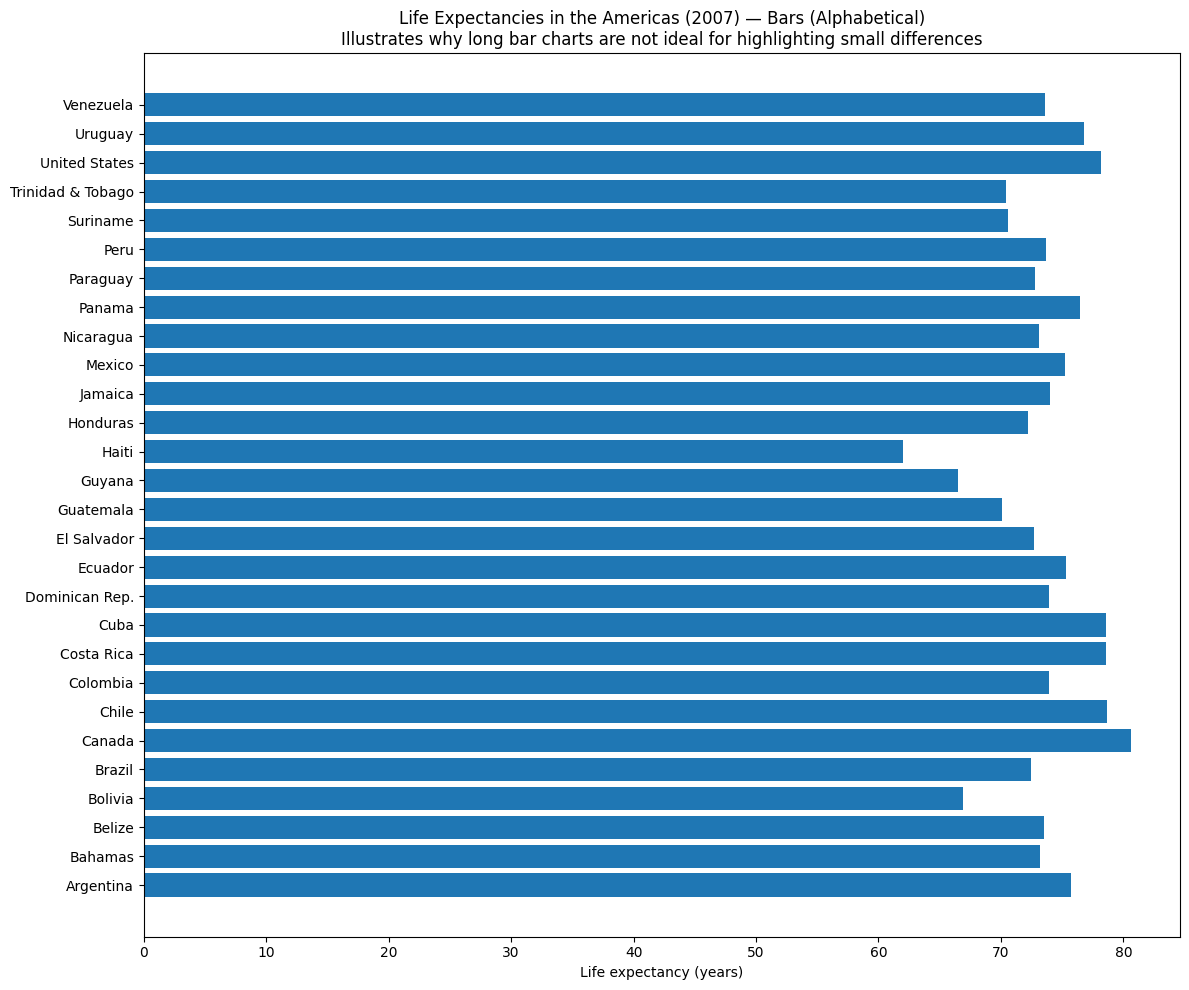

In [18]:

# --------------------------------------------------------
# 2) Life expectancy in the Americas (2007) — Bars (bad)
# --------------------------------------------------------
# Synthetic but plausible 2007 life expectancy data (years) for Americas-like countries
countries = [
    "Canada","United States","Mexico","Belize","Guatemala","Honduras","El Salvador",
    "Nicaragua","Costa Rica","Panama","Colombia","Venezuela","Guyana","Suriname",
    "Ecuador","Peru","Bolivia","Brazil","Paraguay","Uruguay","Chile","Argentina",
    "Cuba","Dominican Rep.","Haiti","Jamaica","Trinidad & Tobago","Bahamas"
]
life_exp = [80.6,78.2,75.2,73.5,70.1,72.2,72.7,
            73.1,78.6,76.5,73.9,73.6,66.5,70.6,
            75.3,73.7,66.9,72.5,72.8,76.8,78.7,75.7,
            78.6,73.9,62.0,74.0,70.4,73.2]

# Sort alphabetically to mimic a common but uninformative order
pairs_alpha = sorted(zip(countries, life_exp), key=lambda x: x[0])
countries_alpha, life_exp_alpha = zip(*pairs_alpha)

plt.figure(figsize=(12, 10))
y_pos = range(len(countries_alpha))
plt.barh(y_pos, life_exp_alpha)
plt.yticks(y_pos, countries_alpha)
plt.xlabel("Life expectancy (years)")
plt.title("Life Expectancies in the Americas (2007) — Bars (Alphabetical)\nIllustrates why long bar charts are not ideal for highlighting small differences")
plt.tight_layout()
plt.show()


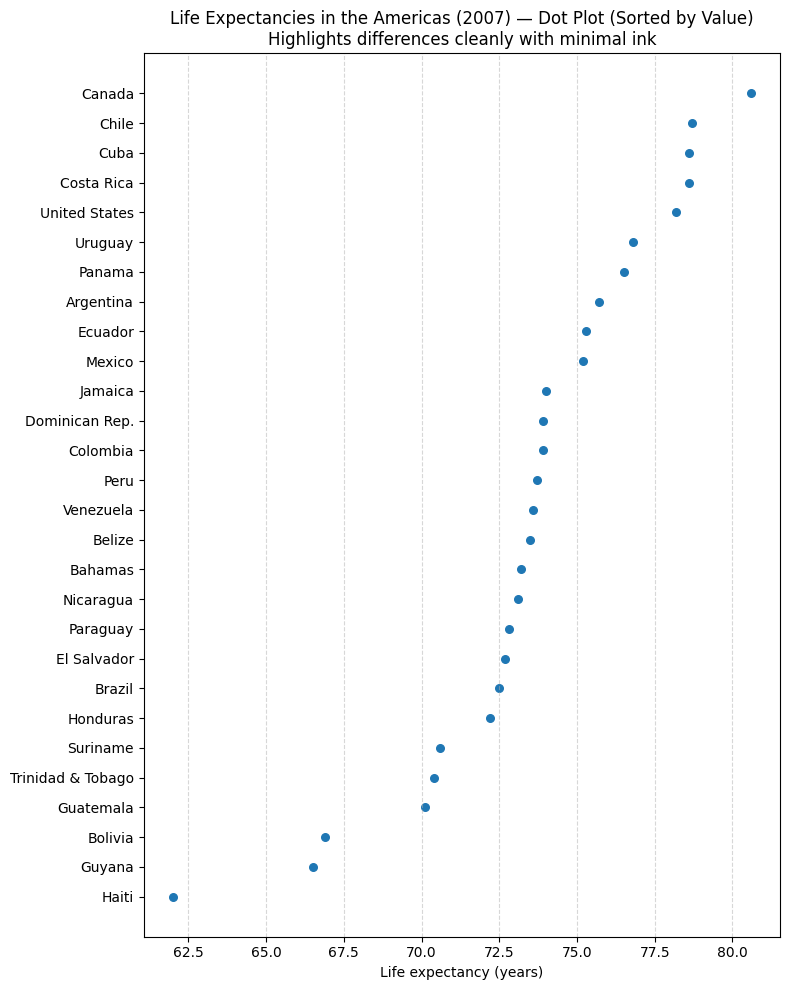

In [19]:

# ----------------------------------------------------------
# 3) Life expectancy — Dot plot (better & value-sorted order)
# ----------------------------------------------------------
pairs_sorted = sorted(zip(countries, life_exp), key=lambda x: x[1])
countries_sorted, life_exp_sorted = zip(*pairs_sorted)

plt.figure(figsize=(8, 10))
y_pos = range(len(countries_sorted))
plt.scatter(life_exp_sorted, y_pos, s=30)
plt.yticks(y_pos, countries_sorted)
plt.xlabel("Life expectancy (years)")
plt.title("Life Expectancies in the Americas (2007) — Dot Plot (Sorted by Value)\nHighlights differences cleanly with minimal ink")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# CHAPTER 7

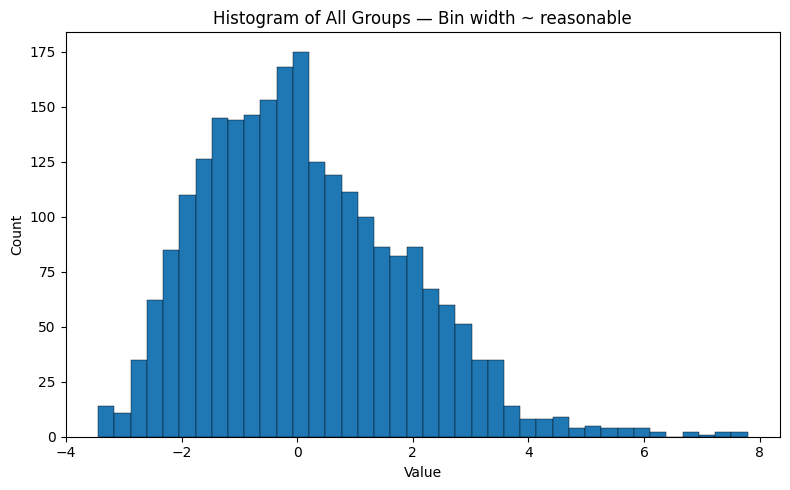

In [20]:

import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(7)

# -----------------------------
# Synthetic data
# -----------------------------
# Three groups with distinct distribution shapes
n = 800
group_A = rng.normal(loc=0, scale=1.0, size=n)                  # ~ N(0, 1)  (unimodal, symmetric)
group_B = np.concatenate([rng.normal(-2, 0.6, n//2),            # bimodal mixture
                          rng.normal(2.2, 0.8, n//2)])
group_C = rng.gamma(shape=2.0, scale=1.2, size=n) - 2.0         # right-skewed (shifted gamma)

data = np.concatenate([group_A, group_B, group_C])
labels = (["A"]*len(group_A)) + (["B"]*len(group_B)) + (["C"]*len(group_C))

# -----------------------------
# 1) Histogram — reasonable bin width
# -----------------------------
plt.figure(figsize=(8,5))
plt.hist(data, bins=40, edgecolor='black', linewidth=0.3)
plt.title("Histogram of All Groups — Bin width ~ reasonable")
plt.xlabel("Value")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

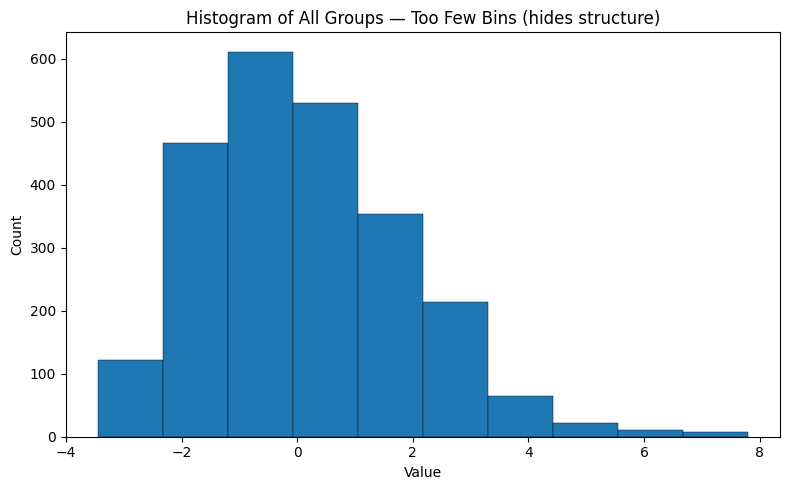

In [21]:
# -----------------------------
# 2) Histogram — too few bins (over-smoothing)
# -----------------------------
plt.figure(figsize=(8,5))
plt.hist(data, bins=10, edgecolor='black', linewidth=0.3)
plt.title("Histogram of All Groups — Too Few Bins (hides structure)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

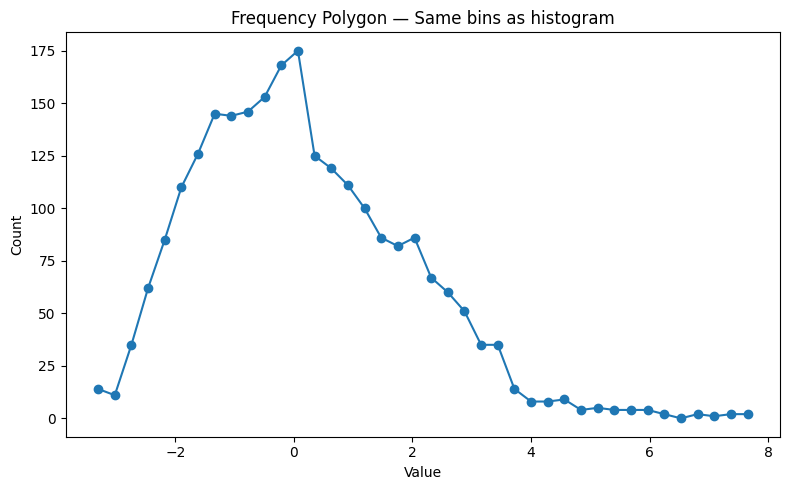

In [22]:
# 3) Frequency polygon (line version of histogram)
# -----------------------------
counts, bin_edges = np.histogram(data, bins=40)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
plt.figure(figsize=(8,5))
plt.plot(bin_centers, counts, marker='o', linestyle='-')
plt.title("Frequency Polygon — Same bins as histogram")
plt.xlabel("Value")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

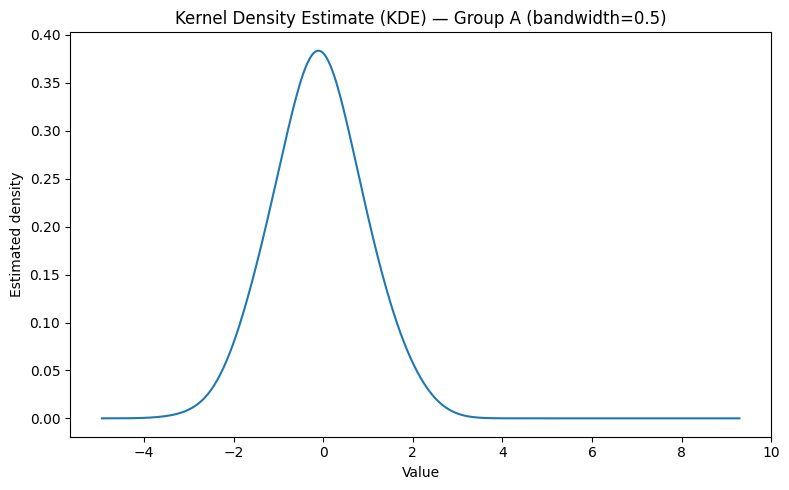

In [23]:

# -----------------------------
# 4) Simple Gaussian KDE for a single group (A)
# -----------------------------
def kde_gaussian(x, samples, bandwidth):
    # Gaussian kernel density estimate evaluated at x
    x = x[:, None]  # column
    diff = (x - samples[None, :]) / bandwidth
    kernel_vals = np.exp(-0.5 * diff**2) / np.sqrt(2*np.pi)
    # Average and scale by bandwidth
    return kernel_vals.mean(axis=1) / bandwidth

x_grid = np.linspace(min(data)-1.5, max(data)+1.5, 600)
bandwidth = 0.5  # try a moderate bandwidth
density_A = kde_gaussian(x_grid, group_A, bandwidth)

plt.figure(figsize=(8,5))
plt.plot(x_grid, density_A)
plt.title("Kernel Density Estimate (KDE) — Group A (bandwidth=0.5)")
plt.xlabel("Value")
plt.ylabel("Estimated density")
plt.tight_layout()
plt.show()



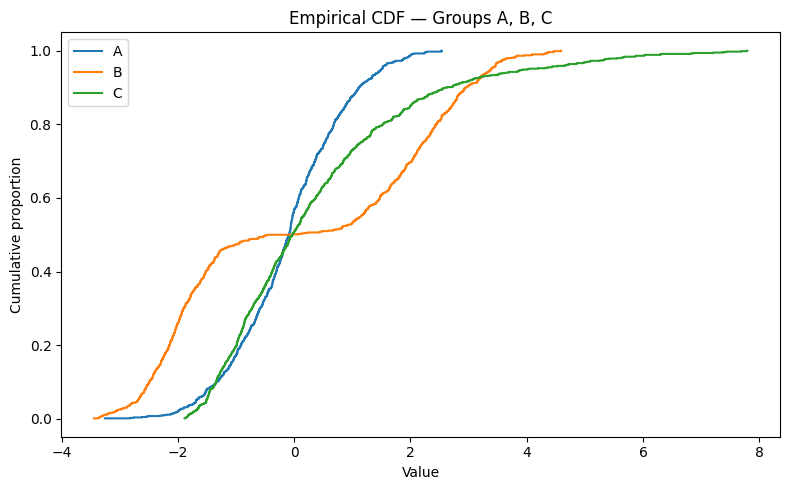

In [24]:

# -----------------------------
# 5) Empirical CDF (ECDF) — all groups overlaid
# -----------------------------
def ecdf(samples):
    x = np.sort(samples)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

xA, yA = ecdf(group_A)
xB, yB = ecdf(group_B)
xC, yC = ecdf(group_C)

plt.figure(figsize=(8,5))
plt.step(xA, yA, where='post', label='A')
plt.step(xB, yB, where='post', label='B')
plt.step(xC, yC, where='post', label='C')
plt.title("Empirical CDF — Groups A, B, C")
plt.xlabel("Value")
plt.ylabel("Cumulative proportion")
plt.legend()
plt.tight_layout()
plt.show()

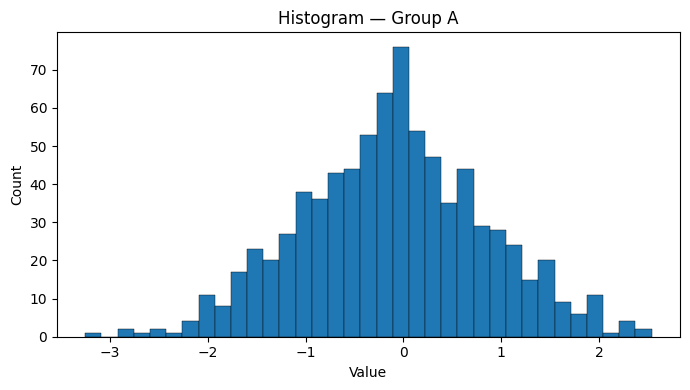

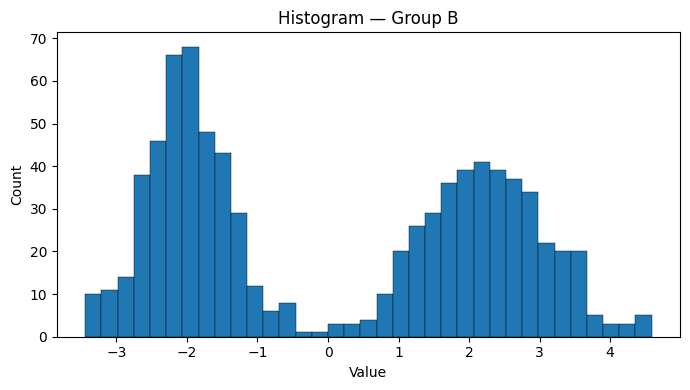

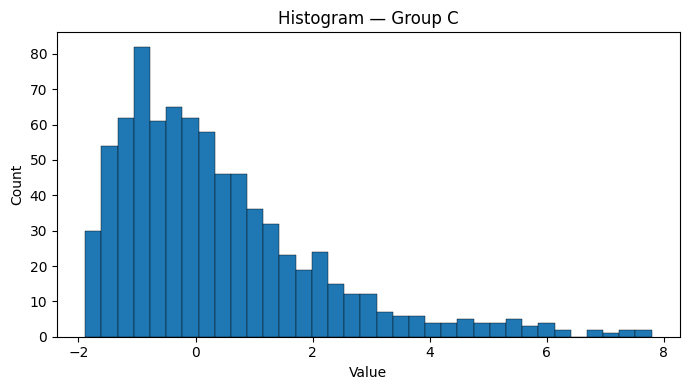

In [26]:
# 8) Small multiples: histograms per group (faceted idea with separate figures)
# -----------------------------
for g_name, g_vals in [('A', group_A), ('B', group_B), ('C', group_C)]:
    plt.figure(figsize=(7,4))
    plt.hist(g_vals, bins=35, edgecolor='black', linewidth=0.3)
    plt.title(f"Histogram — Group {g_name}")
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

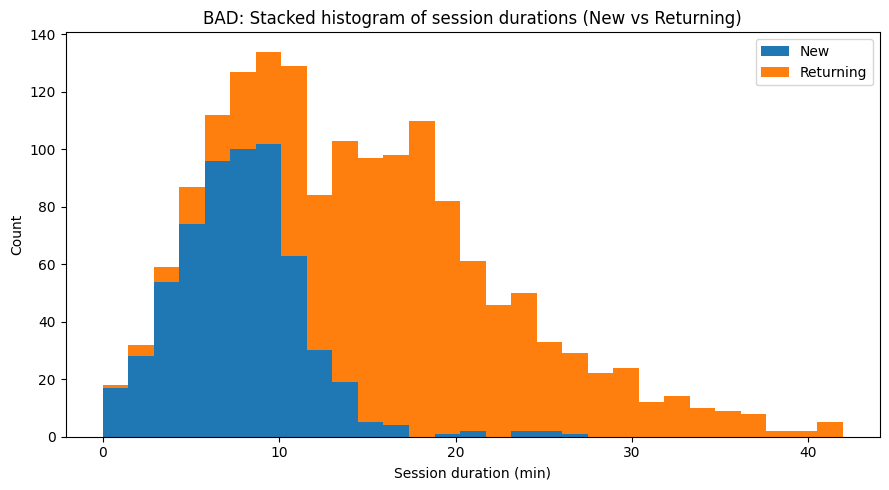

In [27]:

import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

# -----------------------------
# Two-group dataset: session duration (minutes)
# -----------------------------
# New users: generally shorter sessions with a long right tail
n_new = 600
session_new = np.concatenate([
    rng.normal(8, 3, size=500),     # main mass around 8 min
    rng.exponential(6, size=100)    # right tail
])
session_new = session_new[session_new > 0]

# Returning users: longer/more variable sessions
n_ret = 1000
session_ret = np.concatenate([
    rng.normal(16, 5, size=800),
    rng.normal(28, 6, size=200)     # a second hump for power users
])
session_ret = session_ret[session_ret > 0]

# Common bins so comparisons are fair
bins = np.linspace(0, max(session_new.max(), session_ret.max()), 30)

# -----------------------------
# A) BAD: Stacked histogram (easily misread)
# -----------------------------
plt.figure(figsize=(9,5))
plt.hist([session_new, session_ret], bins=bins, stacked=True, label=['New','Returning'])
plt.xlabel("Session duration (min)")
plt.ylabel("Count")
plt.title("BAD: Stacked histogram of session durations (New vs Returning)")
plt.legend()
plt.tight_layout()
plt.show()

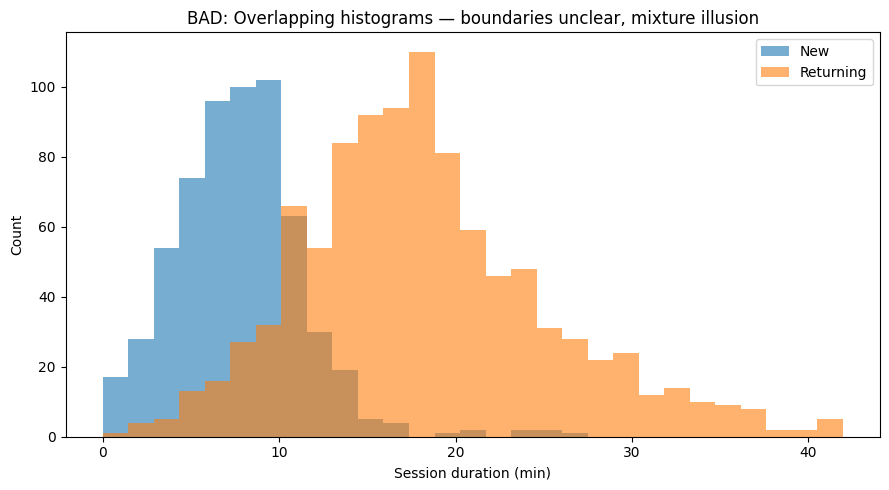

In [28]:
# B) BAD: Overlapping histograms (alpha) — looks like 3 groups
# -----------------------------
plt.figure(figsize=(9,5))
plt.hist(session_new, bins=bins, alpha=0.6, label='New')
plt.hist(session_ret, bins=bins, alpha=0.6, label='Returning')
plt.xlabel("Session duration (min)")
plt.ylabel("Count")
plt.title("BAD: Overlapping histograms — boundaries unclear, mixture illusion")
plt.legend()
plt.tight_layout()
plt.show()


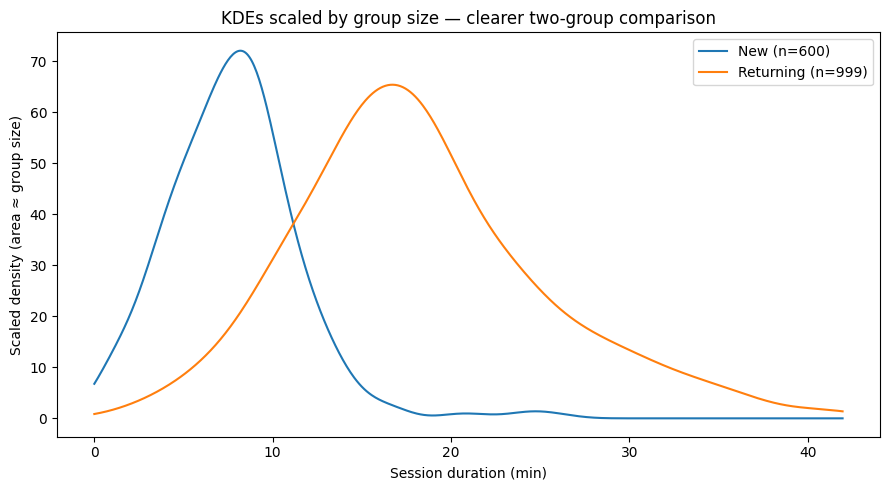

In [30]:
# C) Better: KDEs scaled by group size (area equals group count)
# -----------------------------
def kde_gaussian(x, samples, bandwidth):
    x = x[:, None]
    z = (x - samples[None, :]) / bandwidth
    return np.exp(-0.5 * z**2).mean(axis=1) / (np.sqrt(2*np.pi) * bandwidth)

# Grid for KDEs
x_grid = np.linspace(0, bins[-1], 600)

# Choose bandwidth heuristically (Silverman-ish, simplified)
def silverman_bw(samples):
    s = np.std(samples, ddof=1)
    n = len(samples)
    return 1.06 * s * n ** (-1/5)

bw_new = silverman_bw(session_new)
bw_ret = silverman_bw(session_ret)

dens_new = kde_gaussian(x_grid, session_new, bw_new)
dens_ret = kde_gaussian(x_grid, session_ret, bw_ret)
# Scale KDE so integral approximates group size. (Riemann sum with grid step)
dx = x_grid[1] - x_grid[0]
scaled_new = dens_new * (len(session_new) / (dens_new.sum() * dx))
scaled_ret = dens_ret * (len(session_ret) / (dens_ret.sum() * dx))

plt.figure(figsize=(9,5))
plt.plot(x_grid, scaled_new, label=f"New (n={len(session_new)})")
plt.plot(x_grid, scaled_ret, label=f"Returning (n={len(session_ret)})")
plt.xlabel("Session duration (min)")
plt.ylabel("Scaled density (area ≈ group size)")
plt.title("KDEs scaled by group size — clearer two-group comparison")
plt.legend()
plt.tight_layout()
plt.show()


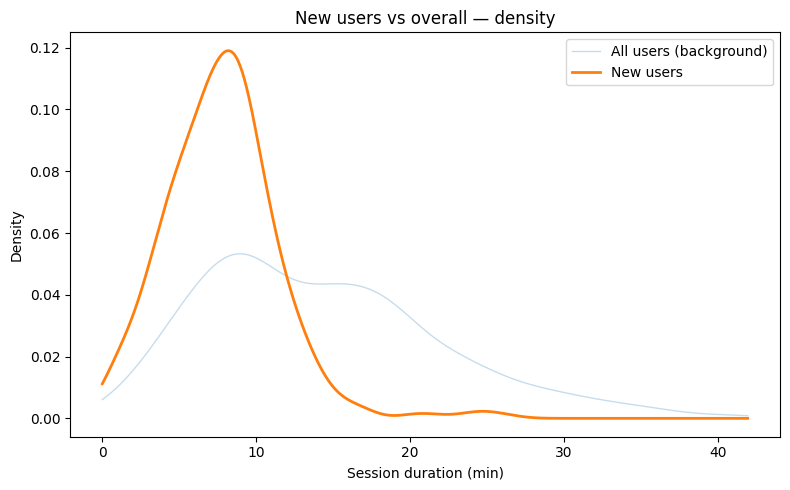

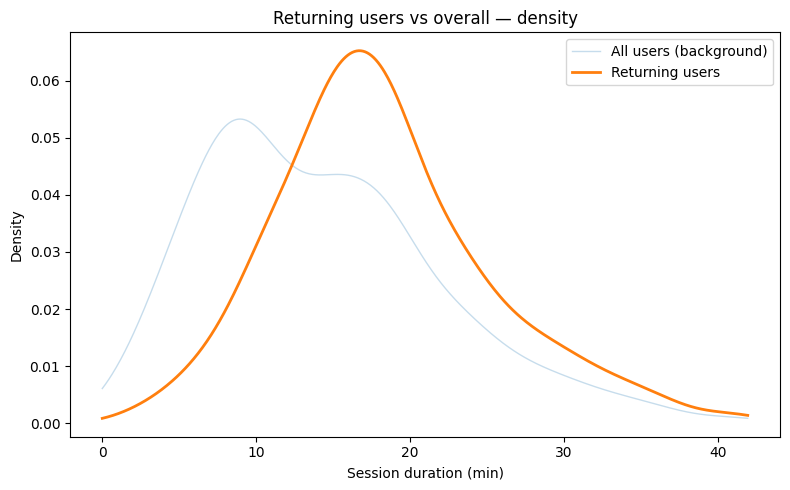

In [31]:

# -----------------------------
# D) Separate panels idea (two separate figures, no subplots):
#    Show each group's density with overall density faintly in background
# -----------------------------
# Overall density
bw_all = silverman_bw(np.concatenate([session_new, session_ret]))
dens_all = kde_gaussian(x_grid, np.concatenate([session_new, session_ret]), bw_all)

# New users panel
plt.figure(figsize=(8,5))
plt.plot(x_grid, dens_all, linewidth=1, alpha=0.25, label="All users (background)")
plt.plot(x_grid, dens_new, linewidth=2, label="New users")
plt.xlabel("Session duration (min)")
plt.ylabel("Density")
plt.title("New users vs overall — density")
plt.legend()
plt.tight_layout()
plt.show()

# Returning users panel
plt.figure(figsize=(8,5))
plt.plot(x_grid, dens_all, linewidth=1, alpha=0.25, label="All users (background)")
plt.plot(x_grid, dens_ret, linewidth=2, label="Returning users")
plt.xlabel("Session duration (min)")
plt.ylabel("Density")
plt.title("Returning users vs overall — density")
plt.legend()
plt.tight_layout()
plt.show()

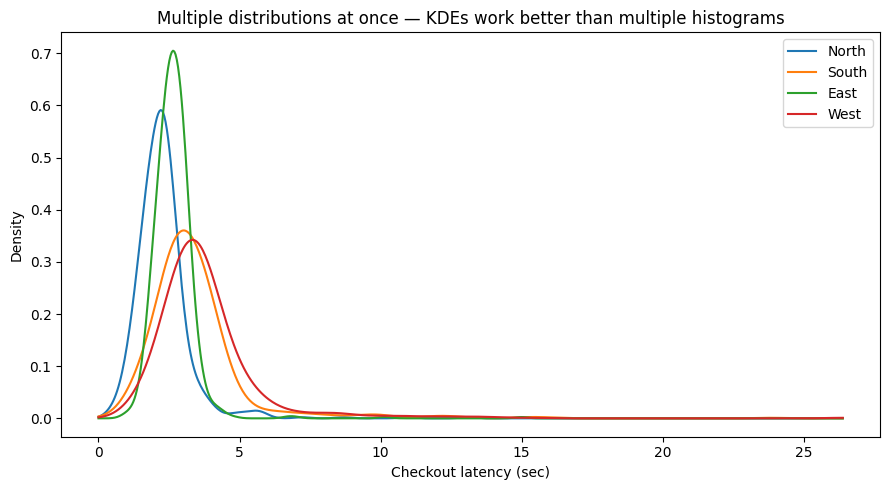

In [32]:
# E) Several distributions at once — 4 regions KDEs (not histograms)
# -----------------------------
# New dataset: "checkout latency (seconds)" across 4 regions
def make_latency(n, base, spread, tail=0.0):
    core = rng.normal(base, spread, size=int(n*(1-tail)))
    tail_vals = rng.lognormal(mean=np.log(base+spread), sigma=0.6, size=int(n*tail))
    x = np.concatenate([core, tail_vals])
    return x[x > 0]

lat_n = make_latency(700, base=2.2, spread=0.6, tail=0.10)  # North
lat_s = make_latency(700, base=3.0, spread=0.8, tail=0.20)  # South
lat_e = make_latency(700, base=2.6, spread=0.5, tail=0.05)  # East
lat_w = make_latency(700, base=3.4, spread=0.9, tail=0.25)  # West

all_lat = [lat_n, lat_s, lat_e, lat_w]
labels = ["North","South","East","West"]
xg = np.linspace(0, max([x.max() for x in all_lat]), 600)

plt.figure(figsize=(9,5))
for arr, lab in zip(all_lat, labels):
    bw = silverman_bw(arr)
    dens = kde_gaussian(xg, arr, bw)
    plt.plot(xg, dens, label=lab)
plt.xlabel("Checkout latency (sec)")
plt.ylabel("Density")
plt.title("Multiple distributions at once — KDEs work better than multiple histograms")
plt.legend()
plt.tight_layout()
plt.show()

# CHAPTER 8